# Preprocessing Script

In here I create all scripts to test the preprocessing script

In [1]:
import sys
import os 
import pandas as pd
import numpy as np
import inspect

%load_ext autoreload
%autoreload 2
sys.path.append("../src/")

import data.make_dataset as make_dataset

In [9]:
!ls /Users/q458471/repo/kdd-cup-2019/data/raw

In [120]:
df_profiles, df_clicks, df_train_plans, df_train_queries, df_test_queries, df_test_plans = \
make_dataset.read_in_data("/Users/q458471/repo/kdd-cup-2019/data/raw")

In [123]:
df_profiles.sample(100).to_csv("../data/interim/sample_profiles.csv", index=None)
df_clicks.sample(100).to_csv("../data/interim/sample_clicks.csv", index=None)
df_train_plans.sample(100).to_csv("../data/interim/sample_train_plans.csv", index=None)
df_train_queries.sample(100).to_csv("../data/interim/sample_train_queries.csv", index=None)
df_test_queries.sample(100).to_csv("../data/interim/sample_test_queries.csv", index=None)
df_test_plans.sample(100).to_csv("../data/interim/sample_test_plans.csv", index=None)

In [17]:
df_test_plans.head()

,sid,plan_time,plans
0,1112456,2018-12-05 17:39:47,"[{""distance"": 465, ""price"": """", ""eta"": 418, ""t..."
1,1413458,2018-12-06 17:49:17,"[{""distance"": 28846, ""price"": 600, ""eta"": 4779..."
2,1243160,2018-12-02 14:50:25,"[{""distance"": 24646, ""price"": 600, ""eta"": 3513..."
3,2040494,2018-12-07 09:23:45,"[{""distance"": 32235, ""price"": 600, ""eta"": 4072..."
4,1448779,2018-12-06 18:24:46,"[{""distance"": 13502, ""price"": 400, ""eta"": 3195..."


In [18]:
df_plans, df_queries =\
make_dataset.concat_data(df_profiles, df_train_plans, df_train_queries, df_test_queries, df_test_plans)

In [22]:
df_queries.head()

,sid,pid,req_time,o,d
0,3000821,NaN,2018-11-02 17:54:30,"116.29,39.97","116.32,39.96"
1,3085857,210736.0,2018-11-16 10:53:10,"116.39,39.84","116.33,39.79"
2,2944522,NaN,2018-10-06 10:33:58,"116.31,39.93","116.27,40.00"
3,559931,202427.0,2018-11-23 14:54:11,"116.27,39.88","116.39,39.90"
4,2819352,172251.0,2018-10-30 11:48:41,"116.34,39.96","116.37,39.86"


In [24]:
df_queries.isnull().sum()

sid              0
pid         195426
req_time         0
o                0
d                0
dtype: int64

In [25]:
df_plans.isnull().sum()

sid          0
plan_time    0
plans        0
dtype: int64

In [26]:
df_clicks.isnull().sum()

sid           0
click_time    0
click_mode    0
dtype: int64

In [27]:
df_queries_pp = make_dataset.preprocess_queries(df_queries)

In [28]:
df_queries_pp.head()

,sid,pid,req_time,o_long,o_lat,d_long,d_lat
0,3000821,NaN,2018-11-02 17:54:30,116.29,39.97,116.32,39.96
1,3085857,210736.0,2018-11-16 10:53:10,116.39,39.84,116.33,39.79
2,2944522,NaN,2018-10-06 10:33:58,116.31,39.93,116.27,40.00
3,559931,202427.0,2018-11-23 14:54:11,116.27,39.88,116.39,39.90
4,2819352,172251.0,2018-10-30 11:48:41,116.34,39.96,116.37,39.86


In [29]:
df_queries_pp = df_queries_pp.assign(distance_query =\
(df_queries_pp.apply(lambda x: make_dataset.calculate_distance([x.o_lat, x.o_long],
                                                               [x.d_lat, x.d_long]),
                     axis=1)))

In [30]:
df_queries_pp.head()

,sid,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query
0,3000821,NaN,2018-11-02 17:54:30,116.29,39.97,116.32,39.96,2.793287
1,3085857,210736.0,2018-11-16 10:53:10,116.39,39.84,116.33,39.79,7.563924
2,2944522,NaN,2018-10-06 10:33:58,116.31,39.93,116.27,40.00,8.490532
3,559931,202427.0,2018-11-23 14:54:11,116.27,39.88,116.39,39.90,10.501168
4,2819352,172251.0,2018-10-30 11:48:41,116.34,39.96,116.37,39.86,11.395753


In [33]:
df_plans_pp = make_dataset.unstack_plans(df_plans)

In [37]:
df_plans_pp.rename({"distance":"distance_plan"}, axis=1, inplace=True)

In [38]:
df_plans_pp.head()

,distance_plan,eta,price,transport_mode,sid,plan_time
0,32303,5087,600,9,1709112,2018-11-04 11:45:04
1,33678,3149,,3,1709112,2018-11-04 11:45:04
2,33678,3269,10000,4,1709112,2018-11-04 11:45:04
3,32099,5996,600,2,1709112,2018-11-04 11:45:04
4,30446,6494,900,1,1709112,2018-11-04 11:45:04


In [54]:
df_plans_pp, df_clicks, df_queries_pp = make_dataset.preprocess_datatypes(
df_plans_pp, df_clicks, df_queries_pp)

In [94]:
df_joined = make_dataset.join_data_sets(df_plans_pp, df_clicks, df_queries_pp)

In [95]:
df_joined.dtypes

sid                 int64
click_time         object
click_mode          int64
distance_plan       int64
eta                 int64
price              object
transport_mode      int64
plan_time          object
pid               float64
req_time           object
o_long            float64
o_lat             float64
d_long            float64
d_lat             float64
distance_query    float64
dtype: object

In [96]:
df_joined = make_dataset.preprocess_datatypes_after_join(df_joined)

In [97]:
df_joined.dtypes

sid                 int64
click_time         object
click_mode          int64
distance_plan       int64
eta                 int64
price             float64
transport_mode      int64
plan_time          object
pid               float64
req_time           object
o_long            float64
o_lat             float64
d_long            float64
d_lat             float64
distance_query    float64
dtype: object

In [98]:
print("{:.2f} % are null values in price".format(len\
(df_joined.loc[df_joined.price.isna()]) / len(df_joined) * 100))

35.56 % are null values in price


/Users/q458471/miniconda3/envs/odm/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


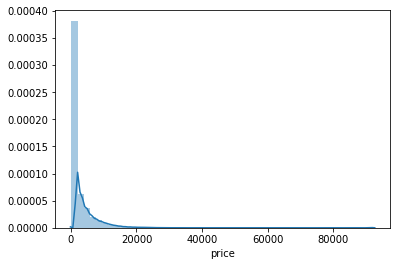

In [99]:
import seaborn as sns
sns.distplot(df_joined.price[~df_joined.price.isna()])

In [101]:
df_joined = make_dataset.fill_missing_price(df_joined)

In [103]:
df_joined.loc[df_joined.price.isna()]

,sid,click_time,click_mode,distance_plan,eta,price,transport_mode,plan_time,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query


/Users/q458471/miniconda3/envs/odm/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


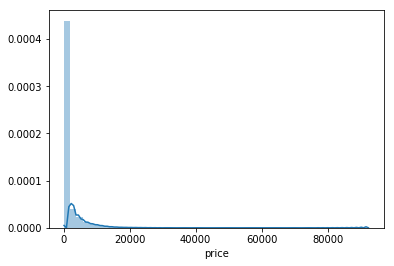

In [107]:
sns.distplot(df_joined.price)

In [111]:
test = df_queries.copy()

In [112]:
test.head()

,sid,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query
0,3000821,NaN,2018-11-02 17:54:30,116.29,39.97,116.32,39.96,2.793287
1,3085857,210736.0,2018-11-16 10:53:10,116.39,39.84,116.33,39.79,7.563924
2,2944522,NaN,2018-10-06 10:33:58,116.31,39.93,116.27,40.00,8.490532
3,559931,202427.0,2018-11-23 14:54:11,116.27,39.88,116.39,39.90,10.501168
4,2819352,172251.0,2018-10-30 11:48:41,116.34,39.96,116.37,39.86,11.395753


In [113]:
test = pd.read_csv("../data/raw/data_set_phase1/test_queries.csv")

In [115]:
test = make_dataset.preprocess_queries(test)

In [116]:
test.head()

,sid,pid,req_time,o_long,o_lat,d_long,d_lat
0,1126541,178395.0,2018-12-05 14:51:43,116.41,39.92,116.46,39.95
1,453685,179178.0,2018-12-01 12:50:33,116.39,39.90,116.41,39.91
2,2066073,184748.0,2018-12-07 10:17:35,116.37,39.71,116.31,39.89
3,452746,162795.0,2018-12-01 07:52:44,116.33,39.97,116.31,39.98
4,1431672,116384.0,2018-12-06 10:36:30,116.51,39.68,116.51,39.68


In [125]:
make_dataset.calculate_distance(test)

,sid,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query
0,1126541,178395.0,2018-12-05 14:51:43,116.41,39.92,116.46,39.95,5.418525
1,453685,179178.0,2018-12-01 12:50:33,116.39,39.90,116.41,39.91,2.039057
2,2066073,184748.0,2018-12-07 10:17:35,116.37,39.71,116.31,39.89,20.635564
3,452746,162795.0,2018-12-01 07:52:44,116.33,39.97,116.31,39.98,2.037604
4,1431672,116384.0,2018-12-06 10:36:30,116.51,39.68,116.51,39.68,0.000000
5,1362848,191817.0,2018-12-04 20:24:18,116.28,40.05,116.30,39.99,6.877407
6,2043270,116294.0,2018-12-07 10:18:36,116.32,39.97,116.32,39.97,0.000000
7,1404698,NaN,2018-12-03 15:02:30,116.37,39.93,116.32,39.79,16.122509
8,1365075,168113.0,2018-12-04 13:34:40,116.32,40.00,116.22,39.95,10.188019
9,1344781,NaN,2018-12-04 11:26:53,116.35,39.91,116.37,39.96,5.808907


In [133]:
from geopy.distance import distance


In [138]:

def a(df):
    df = df.assign(
        distance_query=(
            df.apply(
                lambda x: (distance([x.o_lat, x.o_long], [x.d_lat, x.d_long]).km),
                axis=1,
            )
        )
    )

    return df

In [148]:

def b(df):  
    return (df.apply(lambda x: (distance([x.o_lat, x.o_long], [x.d_lat, x.d_long]).km),axis=1))

In [135]:
%%time 
tmp = a(test)

CPU times: user 23.9 s, sys: 150 ms, total: 24 s
Wall time: 25.4 s


In [137]:
%%time
df_queries_pp = a(test)


CPU times: user 23.4 s, sys: 132 ms, total: 23.6 s
Wall time: 25.2 s


In [149]:
%%time

# Vectorized implementation of Haversine applied on Pandas series
tmp["test2"] = b(test)

CPU times: user 20.9 s, sys: 64.2 ms, total: 21 s
Wall time: 21.4 s


In [146]:
tmp

,sid,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query
0,1126541,178395.0,2018-12-05 14:51:43,116.41,39.92,116.46,39.95,5.418525
1,453685,179178.0,2018-12-01 12:50:33,116.39,39.90,116.41,39.91,2.039057
2,2066073,184748.0,2018-12-07 10:17:35,116.37,39.71,116.31,39.89,20.635564
3,452746,162795.0,2018-12-01 07:52:44,116.33,39.97,116.31,39.98,2.037604
4,1431672,116384.0,2018-12-06 10:36:30,116.51,39.68,116.51,39.68,0.000000
5,1362848,191817.0,2018-12-04 20:24:18,116.28,40.05,116.30,39.99,6.877407
6,2043270,116294.0,2018-12-07 10:18:36,116.32,39.97,116.32,39.97,0.000000
7,1404698,NaN,2018-12-03 15:02:30,116.37,39.93,116.32,39.79,16.122509
8,1365075,168113.0,2018-12-04 13:34:40,116.32,40.00,116.22,39.95,10.188019
9,1344781,NaN,2018-12-04 11:26:53,116.35,39.91,116.37,39.96,5.808907


In [150]:
df_done = pd.read_pickle("../data/processed/df_processed.pickle")

In [153]:
df_done.head()

,sid,click_time,click_mode,distance_plan,eta,price,transport_mode,plan_time,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query
0,2848914,2018-11-17 18:42:17,1,53156,6456,700.0,1,2018-11-17 12:56:15,101804.0,2018-11-17 12:56:15,116.36,40.07,116.00,40.35,43.656570
1,2848914,2018-11-17 18:42:17,1,48112,3535,700.0,3,2018-11-17 12:56:15,101804.0,2018-11-17 12:56:15,116.36,40.07,116.00,40.35,43.656570
2,2848914,2018-11-17 18:42:17,1,48112,3655,16500.0,4,2018-11-17 12:56:15,101804.0,2018-11-17 12:56:15,116.36,40.07,116.00,40.35,43.656570
3,2848914,2018-11-17 18:42:17,1,51641,8871,1200.0,1,2018-11-17 12:56:15,101804.0,2018-11-17 12:56:15,116.36,40.07,116.00,40.35,43.656570
4,2629085,2018-10-12 16:28:13,3,13207,2790,400.0,9,2018-10-12 16:27:55,203797.0,2018-10-12 16:27:55,116.35,40.08,116.33,40.03,5.808139


In [156]:
pd.read_pickle("../data/processed/df_processed.pickle").shape

(2101060, 15)